In [20]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

%matplotlib inline

In [21]:
methods = ['No_deconv', 'FPFS',
           'Richard-Lucy(10)', 'Richard-Lucy(20)', 
        #    'Richard-Lucy(30)', 'Richard-Lucy(50)', 'Richard-Lucy(100)',
         #   'Unrolled_ADMM(1)', 'Unrolled_ADMM(2)', 
           'Unrolled_ADMM(4)', 'Unrolled_ADMM(8)']
snrs = [5, 10, 20, 40, 60, 80, 100, 150, 200]

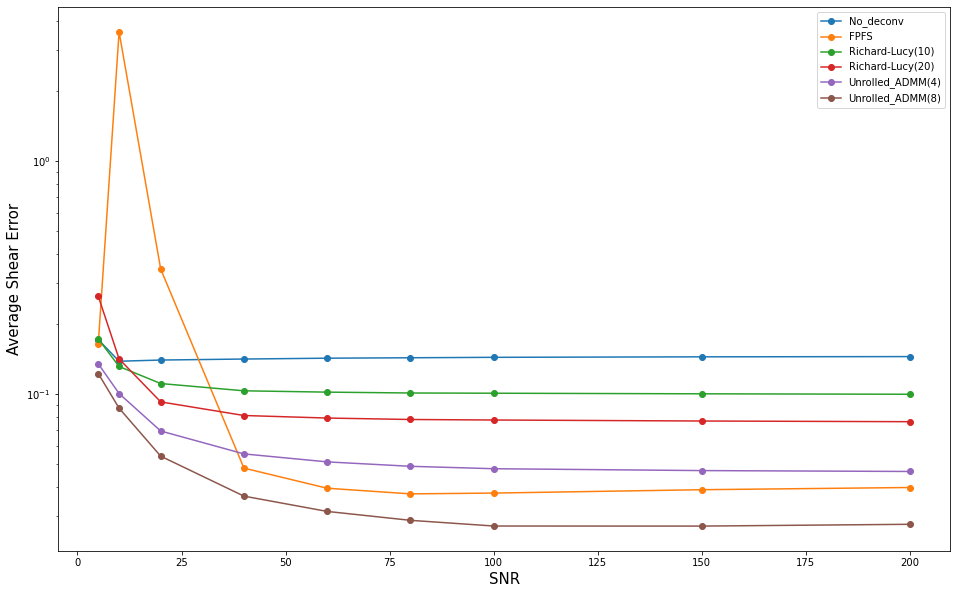

In [22]:
fig, ax1 = plt.subplots(figsize=(16,10))

for method in methods:
    g_errs, g_stds = [], []
    results_file = os.path.join('results', method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_deconv':
        gt_shear = np.array(results['20']['gt_shear'])
        
    for snr in snrs:
        rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))
    plt.plot(snrs, g_errs, '-o', label=method)

# for t, g_err, g_std, method in zip(ts, g_errs, g_stds, methods):
#     color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
#     bias = -0.007 if 'ADMM' in method else 0.002
#     plt.errorbar(t, g_err, yerr=g_std, marker='o', color=color)
#     plt.text(t, g_err+bias, method, fontsize=13)
    
# plt.xlim([-0.0005, 0.0222])
# plt.ylim([0., 0.23])
plt.yscale('log')
plt.ylabel('Average Shear Error', fontsize=15)
plt.xlabel('SNR', fontsize=15)
plt.legend()
plt.savefig(os.path.join('figures', f'err_snr.jpg'), bbox_inches='tight')
plt.show()